In [907]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [908]:
# Importando os dataset
df1 = pd.read_excel('datasets/Aracaju.xlsx')
df2 = pd.read_excel('datasets/Fortaleza.xlsx')
df3 = pd.read_excel('datasets/Natal.xlsx')
df4 = pd.read_excel('datasets/Recife.xlsx')
df5 = pd.read_excel('datasets/Salvador.xlsx')

In [909]:
# Realizando a integração dos arquivos
df = pd.concat([df1,df2,df3,df4,df5])
display(df)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


In [910]:
# Verificando as dimensões da tabela
df.shape

(894, 5)

In [911]:
# Verificando os tipos de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [912]:
# Alterando o tipo de dado da variável "LojaID", visto que trata-se de um ID e não será utilizado em 
# cálculos.
df['LojaID'] = df['LojaID'].astype('object')
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [913]:
# Criando a coluna de Receita
df['Receita'] = df['Vendas'] * df['Qtde']

In [914]:
# Verificando os dados com uma amostra aleatória
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
239,Natal,2019-01-03,161.41,1037,3,484.23
128,Fortaleza,2019-03-02,38.70,982,4,154.80
194,Salvador,2019-01-02,156.47,1035,1,156.47
58,Salvador,2019-01-01,20.64,1037,2,41.28
9,Aracaju,2019-01-01,149.36,1523,3,448.08


In [915]:
# Verificação de observações vazias
display(df.isnull().sum(),df.isna().sum())

Cidade     0
Data       0
Vendas     0
LojaID     0
Qtde       0
Receita    0
dtype: int64

Cidade     0
Data       0
Vendas     0
LojaID     0
Qtde       0
Receita    0
dtype: int64

### Análise de Insights

Nesta seção será gerado os insights para a exploração das variáveis do dataset.

In [916]:
# Verificação das estatísticas básicas do df
round(df.describe(),ndigits=2)

,Vendas,Qtde,Receita
count,894.00,894.00,894.00
mean,122.61,3.26,387.50
std,166.82,2.10,575.52
min,3.01,1.00,3.34
25%,22.38,2.00,63.54
50%,44.00,3.00,155.56
75%,160.93,4.00,458.31
max,886.00,10.00,3544.00


In [917]:
# Ranking de maiores vendas
df[['Cidade','Vendas']].nlargest(5,'Vendas')

,Cidade,Vendas
7,Natal,886.0
40,Natal,885.0
24,Natal,868.0
82,Natal,868.0
51,Natal,859.0


In [918]:
# Ranking de piores vendas
df[['Cidade','Vendas']].nsmallest(5,'Vendas')

,Cidade,Vendas
3,Aracaju,3.01
34,Fortaleza,3.10
73,Fortaleza,3.10
118,Aracaju,3.34
27,Aracaju,3.39


In [919]:
# Ranking de vendas por cidade
df.groupby('Cidade')['Vendas'].sum().sort_values(ascending=False)

Cidade
Natal        59187.76
Salvador     19714.40
Recife       11119.10
Fortaleza    10120.71
Aracaju       9472.98
Name: Vendas, dtype: float64

In [920]:
# Ranking de Receita média por cidade
round(df.groupby('Cidade')['Receita'].mean().sort_values(ascending=False),ndigits=2)

Cidade
Natal        696.78
Aracaju      374.99
Recife       365.75
Fortaleza    267.00
Salvador     169.15
Name: Receita, dtype: float64

In [921]:
# Ano com maior Vendas
df.groupby(df['Data'].dt.year)['Vendas'].sum().sort_values(ascending=False)

Data
2019    78158.28
2018    31456.67
Name: Vendas, dtype: float64

In [922]:
# Ano com Maior Receita
df.groupby(df['Data'].dt.year)['Receita'].sum().sort_values(ascending=False)

Data
2019    228246.45
2018    118176.53
Name: Receita, dtype: float64

In [923]:
# Criando nova coluna para ano, mes, dia
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.day

In [924]:
# Amostra para verificação de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia
117,Salvador,2019-03-02,39.41,1034,1,39.41,2019,3,2
59,Salvador,2019-01-01,138.27,1034,2,276.54,2019,1,1
0,Recife,2019-01-01,162.61,981,1,162.61,2019,1,1
80,Aracaju,2018-01-01,121.77,1523,3,365.31,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1


In [925]:
import calendar
import locale

In [926]:
# Criando uma coluna com o nome dos meses
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')
df['Mês_nome'] = df['Mês'].apply(lambda x: calendar.month_name[x])

In [927]:
display(df)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia,Mês_nome
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,janeiro
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,janeiro
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,janeiro
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,janeiro
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,janeiro
...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,janeiro
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,janeiro
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,janeiro
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,janeiro


In [928]:
# Vendas por mês
vendasMes = df.groupby('Mês_nome')['Vendas'].sum().sort_values(ascending=False)
vendasMes

Mês_nome
janeiro      60454.29
marÃ§o       20546.23
fevereiro    11785.43
abril         4698.00
outubro       2783.00
maio          2506.00
junho         2163.00
setembro      1858.00
julho         1380.00
agosto         606.00
novembro       563.00
dezembro       272.00
Name: Vendas, dtype: float64

In [929]:
# Alterando o rótulo
df.loc[df['Mês_nome'] == 'marÃ§o','Mês_nome'] = 'Marco'

In [930]:
# Transformando a coluna de mês com a primeira letra maiúscula
df['Mês_nome'] = df['Mês_nome'].str.capitalize()
df.groupby('Mês_nome')['Vendas'].sum().sort_values(ascending=False)

Mês_nome
Janeiro      60454.29
Marco        20546.23
Fevereiro    11785.43
Abril         4698.00
Outubro       2783.00
Maio          2506.00
Junho         2163.00
Setembro      1858.00
Julho         1380.00
Agosto         606.00
Novembro       563.00
Dezembro       272.00
Name: Vendas, dtype: float64

In [931]:
# Filtrando as vendas de Abril de 2019
Vendas_Abr_2019 = df.loc[(df['Mês_nome'] == 'Abril') & (df['Ano'] == 2019)]
display(Vendas_Abr_2019)
print('Encontrado {} registros.'.format(len(Vendas_Abr_2019)))

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia,Mês_nome
43,Natal,2019-04-01,538.0,853,3,1614.0,2019,4,1,Abril
49,Natal,2019-04-01,831.0,852,2,1662.0,2019,4,1,Abril
65,Natal,2019-04-05,292.0,852,2,584.0,2019,4,5,Abril
77,Natal,2019-04-01,426.0,853,3,1278.0,2019,4,1,Abril
81,Natal,2019-04-02,564.0,854,2,1128.0,2019,4,2,Abril


Encontrado 5 registros.


### Visualização dos dados

Nessa seção, apresentaremos os insights proveniente das análises anteriores.

In [932]:
agruparMeses = df.groupby('Mês_nome').sum().reset_index().sort_values(by='Vendas',ascending=False)
agruparMeses = agruparMeses[['Mês_nome','Vendas']]

In [933]:
display(df[df['Ano'] == 2019].value_counts('Mês_nome'))
display(df[df['Ano'] == 2018].value_counts('Mês_nome'))

Mês_nome
Janeiro      564
Marco        121
Fevereiro     39
Abril          5
dtype: int64

Mês_nome
Janeiro      132
Fevereiro      5
Maio           5
Julho          4
Junho          4
Outubro        4
Abril          3
Setembro       3
Marco          2
Agosto         1
Dezembro       1
Novembro       1
dtype: int64

In [934]:
# Valores médio por Ano
MediaAno = round(df.groupby(df['Ano'])[['Vendas','Qtde','Receita']].mean(),ndigits=2)
display(MediaAno)

,Vendas,Qtde,Receita
Ano,,,
2018,190.65,4.70,716.22
2019,107.21,2.94,313.10


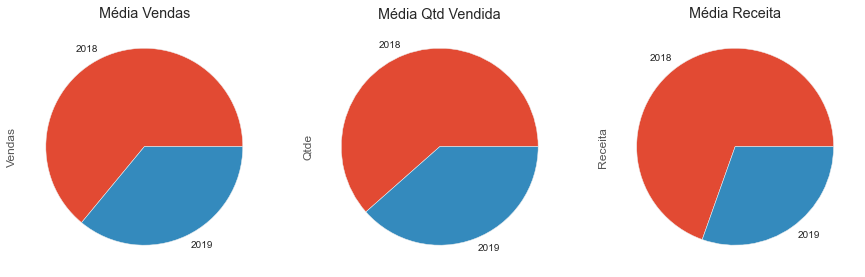

In [935]:
# Definindo o estilo dos gráficos
plt.style.use('ggplot')

# Subplotando em 3 colunas
fig, axes = plt.subplots(1,3, figsize = (15,5))

# Plotagem dos gráficos
MediaAno['Vendas'].plot.pie(ax=axes[0], title='Média Vendas')
MediaAno['Qtde'].plot.pie(ax=axes[1], title='Média Qtd Vendida')
MediaAno['Receita'].plot.pie(ax=axes[2], title='Média Receita');

Nota-se que para a métrica de média das três variáveis analisadas (Vendas, Quantidade e Receita) o ano de 2018 prevalece as maiores métricas

In [936]:
# Soma médio por Ano
SomaAno = round(df.groupby(df['Ano'])[['Vendas','Qtde','Receita']].sum(),ndigits=2)
display(SomaAno)

,Vendas,Qtde,Receita
Ano,,,
2018,31456.67,775,118176.53
2019,78158.28,2141,228246.45


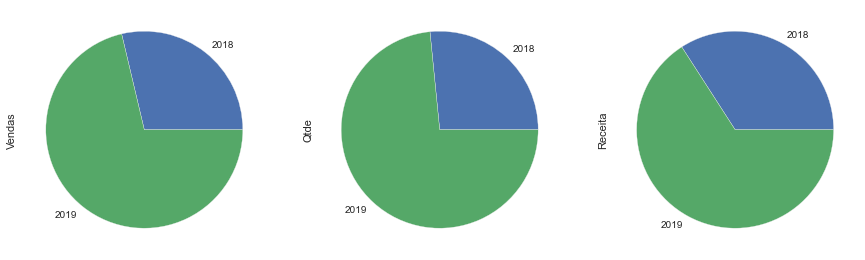

In [937]:
# Definindo o estilo dos gráficos
plt.style.use('seaborn')

# Subplotando em 3 colunas
fig, axes = plt.subplots(1,3, figsize = (15,5))

# Plotagem dos gráficos
SomaAno['Vendas'].plot.pie(ax=axes[0])
SomaAno['Qtde'].plot.pie(ax=axes[1])
SomaAno['Receita'].plot.pie(ax=axes[2]);

No entanto, para a métrica de soma das variáveis alvo, o ano de 2019 possui maior desempenho.

In [938]:
# Realizando um filtro do top 5 Lojas que mais venderam
topId2019 = df.loc[df['Ano'] == 2019,].groupby(['LojaID','Ano'])['Vendas'].sum().sort_values(ascending=False).head(5)
topId2018 = df.loc[df['Ano'] == 2018,].groupby(['LojaID','Ano'])['Vendas'].sum().sort_values(ascending=False).head(5)

display(topId2018, topId2019)

LojaID  Ano 
852     2018    10427.00
853     2018     6316.00
854     2018     5738.00
1522    2018     2480.26
1520    2018     2452.26
Name: Vendas, dtype: float64

LojaID  Ano 
1036    2019    10416.46
854     2019     9622.00
1035    2019     9511.02
853     2019     8805.00
1037    2019     7951.65
Name: Vendas, dtype: float64

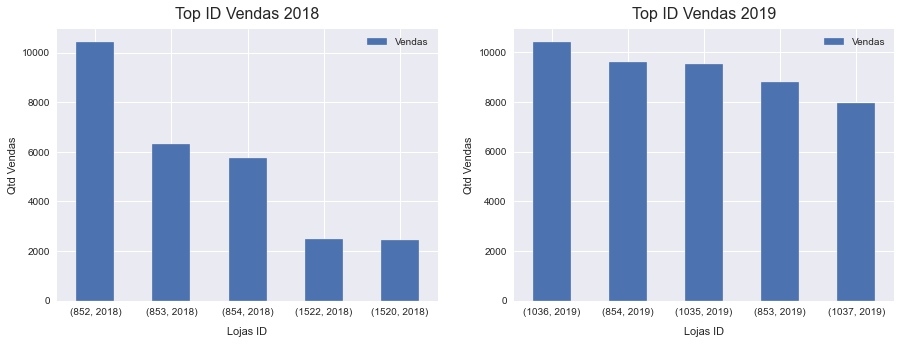

In [939]:
# Definindo o estilo dos gráficos
plt.style.use('seaborn')

# Subplotando em 3 colunas
fig, axes = plt.subplots(1,2, figsize = (15,5))

topId2018.plot.bar(ax=axes[0], title = 'Top ID Vendas 2018',legend=True)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='horizontal')
axes[0].set_title('Top ID Vendas 2018', 
                  fontsize=16,pad=10)
axes[0].set_xlabel('Lojas ID', labelpad=10)
axes[0].set_ylabel('Qtd Vendas',labelpad=5)


topId2019.plot.bar(ax=axes[1], title = 'Top ID Vendas 2019',legend=True)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='horizontal');
axes[1].set_title('Top ID Vendas 2019', 
                  fontsize=16, pad=10)
axes[1].set_xlabel('Lojas ID',labelpad=10)
axes[1].set_ylabel('Qtd Vendas',labelpad=5);

In [940]:
# Realizando um filtro do top 5 cidades com maiores receitas
topCidades2019 = df.loc[df['Ano'] == 2019,].groupby(['Cidade','Ano'])['Receita'].sum().sort_values(ascending=False).head(5)
topCidades2018 = df.loc[df['Ano'] == 2018,].groupby(['Cidade','Ano'])['Receita'].sum().sort_values(ascending=False).head(5)

display(topCidades2018, topCidades2019)

Cidade    Ano 
Natal     2018    71750.00
Aracaju   2018    46276.29
Salvador  2018      150.24
Name: Receita, dtype: float64

Cidade     Ano 
Natal      2019    95477.52
Recife     2019    51936.51
Salvador   2019    40446.49
Fortaleza  2019    37913.97
Aracaju    2019     2471.96
Name: Receita, dtype: float64

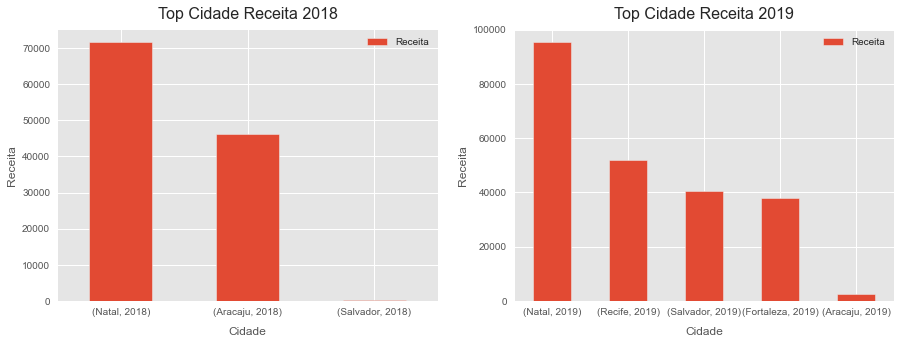

In [941]:
# Definindo o estilo dos gráficos
plt.style.use('ggplot')

# Subplotando em 3 colunas
fig, axes = plt.subplots(1,2, figsize = (15,5))

topCidades2018.plot.bar(ax=axes[0], title = 'Top Cidades Receita 2018',legend=True)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='horizontal')
axes[0].set_title('Top Cidade Receita 2018', 
                  fontsize=16,pad=10)
axes[0].set_xlabel('Cidade', labelpad=10)
axes[0].set_ylabel('Receita',labelpad=5)


topCidades2019.plot.bar(ax=axes[1], title = 'Top Cidades Receita 2019',legend=True)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='horizontal');
axes[1].set_title('Top Cidade Receita 2019', 
                  fontsize=16, pad=10)
axes[1].set_xlabel('Cidade',labelpad=10)
axes[1].set_ylabel('Receita',labelpad=5);

In [942]:
# Realizando um filtro do top 5 meses com maiores vendas
topMes2018 = df.loc[df['Ano'] == 2018,].groupby('Mês_nome')['Vendas'].sum().sort_values(ascending=False).head(5)
topMes2019 = df.loc[df['Ano'] == 2019,].groupby('Mês_nome')['Vendas'].sum().sort_values(ascending=False).head(5)

display(topMes2018, topMes2019)

Mês_nome
Janeiro      13172.67
Fevereiro     2881.00
Outubro       2783.00
Maio          2506.00
Junho         2163.00
Name: Vendas, dtype: float64

Mês_nome
Janeiro      47281.62
Marco        19321.23
Fevereiro     8904.43
Abril         2651.00
Name: Vendas, dtype: float64

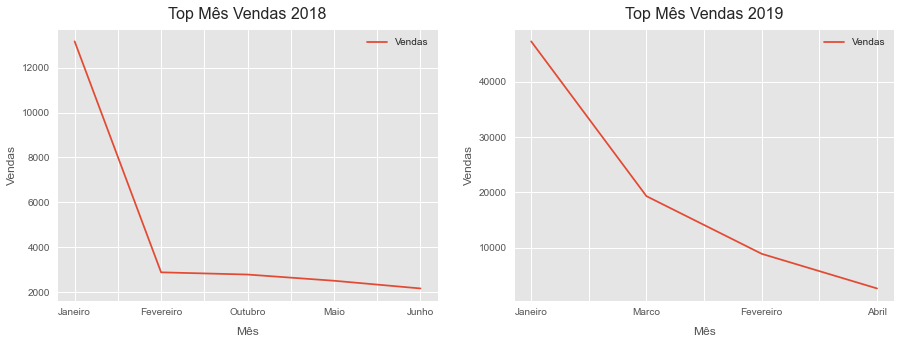

In [943]:
# Definindo o estilo dos gráficos
plt.style.use('ggplot')

# Subplotando em 3 colunas
fig, axes = plt.subplots(1,2, figsize = (15,5))

topMes2018.plot.line(ax=axes[0], title = 'Top Mês Vendas 2018',legend=True)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='horizontal')
axes[0].set_title('Top Mês Vendas 2018', 
                  fontsize=16,pad=10)
axes[0].set_xlabel('Mês', labelpad=10)
axes[0].set_ylabel('Vendas',labelpad=5)


topMes2019.plot.line(ax=axes[1], title = 'Top Mês Vendas 2019',legend=True)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='horizontal');
axes[1].set_title('Top Mês Vendas 2019', 
                  fontsize=16, pad=10)
axes[1].set_xlabel('Mês',labelpad=10)
axes[1].set_ylabel('Vendas',labelpad=5);